

# **Hand Written Digit Prediction - Classification Analysis**


The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents.


# Data Source

sklearn dataset -> load_digits

# Import Library

In [44]:
import pandas as pd

In [45]:
import numpy as np

In [46]:
import matplotlib.pyplot as plt

# Import Data

In [47]:
from sklearn.datasets import load_digits

In [48]:
df=load_digits()

# Describe Data

In [55]:
df.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

# Data Visualization

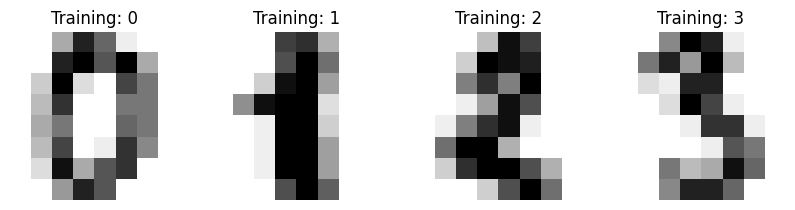

In [8]:
_,axes = plt.subplots (nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow (image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


# Data Preprocessing

Flatten Image

In [9]:
df.images.shape

(1797, 8, 8)

In [10]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
df.images[0].shape

(8, 8)

In [12]:
len(df.images)

1797

In [13]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data[0].shape

(64,)

In [16]:
data.shape

(1797, 64)

Scaling Image Data

In [17]:
data.min()

0.0

In [18]:
data.max()

16.0

In [19]:
data=data/16

In [20]:
data.min()

0.0

In [21]:
data.max()

1.0

In [22]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Modeling

Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf=RandomForestClassifier()

In [31]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# Prediction

In [32]:
y_pred=rf.predict(x_test)

In [33]:
y_pred

array([6, 6, 7, 3, 7, 1, 9, 4, 2, 3, 8, 2, 9, 2, 6, 5, 2, 0, 7, 4, 7, 1,
       9, 1, 5, 2, 9, 9, 5, 6, 7, 3, 7, 8, 0, 4, 8, 5, 2, 1, 9, 7, 6, 7,
       3, 7, 2, 5, 1, 3, 0, 9, 0, 3, 1, 6, 7, 5, 4, 5, 6, 5, 8, 4, 2, 2,
       2, 8, 0, 3, 7, 1, 0, 3, 9, 5, 9, 5, 1, 2, 9, 0, 4, 7, 6, 7, 8, 6,
       9, 9, 1, 3, 6, 0, 8, 7, 0, 0, 4, 9, 9, 7, 4, 0, 2, 9, 2, 7, 1, 4,
       4, 9, 5, 9, 3, 1, 8, 6, 6, 9, 8, 4, 1, 4, 0, 3, 6, 0, 9, 4, 5, 6,
       5, 1, 3, 4, 0, 8, 4, 1, 9, 3, 2, 0, 6, 5, 3, 4, 3, 9, 1, 0, 3, 8,
       6, 9, 6, 9, 5, 5, 2, 0, 5, 1, 9, 6, 6, 0, 1, 4, 5, 5, 9, 2, 4, 6,
       3, 1, 8, 4, 9, 7, 9, 3, 1, 4, 4, 8, 8, 5, 5, 3, 7, 8, 7, 5, 0, 8,
       9, 8, 9, 2, 6, 6, 8, 6, 3, 8, 0, 3, 3, 6, 8, 9, 2, 9, 9, 3, 2, 5,
       4, 6, 4, 3, 0, 0, 4, 0, 7, 0, 4, 5, 4, 2, 7, 9, 6, 4, 5, 5, 5, 7,
       3, 2, 0, 4, 2, 8, 1, 5, 8, 9, 2, 1, 5, 1, 6, 3, 7, 4, 0, 6, 9, 9,
       5, 2, 8, 3, 4, 6, 3, 9, 9, 6, 6, 4, 2, 3, 3, 4, 0, 6, 9, 5, 9, 9,
       6, 3, 3, 7, 5, 2, 8, 2, 3, 1, 2, 4, 9, 7, 2,

# Model Evaluation

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
confusion_matrix(y_test,y_pred)

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 50,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  1,  0],
       [ 0,  2,  1,  1,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 58]])

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.96      1.00      0.98        45
           2       0.98      1.00      0.99        52
           3       0.98      0.98      0.98        57
           4       1.00      0.98      0.99        63
           5       0.96      0.98      0.97        51
           6       0.98      0.96      0.97        55
           7       1.00      0.98      0.99        61
           8       0.96      0.92      0.94        48
           9       0.98      0.98      0.98        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# Explanation

Here we applied the random forest classifier to predict the hand written digits. A random forest classifier uses various decision trees to make predictions. Hence, gives a good accuracy score as we can see from the classification report that we have got an accuracy of 0.98.